# Summary

<p>
This project uses the <a href="https://pypi.org/project/nba-api/">"nba-api 1.1.9"</a> as a use case for understanding the topic of <b>REST API clients</b>. The nba-api is a an API Client package to access the APIs for NBA.com. The project is inspired by the Coursera IBM course: "Python for Data Science, AI & Development".
</p>

<p>
<b>What is an API?</b><br>
"An <b>API</b> is a set of definitions and protocols for building and integrating application software. It’s sometimes referred to as a contract between an information provider and an information user—establishing the content required from the consumer (the call) and the content required by the producer (the response). For example, the API design for a weather service could specify that the user supply a zip code and that the producer reply with a 2-part answer, the first being the high temperature, and the second being the low."<br>
<a href="https://www.redhat.com/en/topics/api/what-is-a-rest-api">Redhat</a> 
</p> 


<p>
<b>What is a RESTful API?</b><br>
Software systems can share data. "The Restful API (Representational State Transfer) works to give the client a series of results once they link to the URL. For Restful API to work, one has to use the correct HTTP procedures. These procedures specify the operation that needs to be carried out with the API.The client sends a call to the server for a given resource. Usually, it is an HTTP request. The server receives the request and starts processing the response by checking the available cache resources that include the requested tag header." The server then sends a response back.<br>
<a href="https://rapidapi.com/blog/api-glossary/what-is-a-restful-api-understanding-the-restful-api-definition/">Visit api-glossary</a> 
</p>

### Practical approaches:
<p>
it is helpful to study the rules, proctocols and conceptualization of the API. It is often less strenuous than do trial and error. Also the API's maintained by communities but also by enterprises are prone to disfunction and must be validated regularly. As the data architecture of the data provider NBA changes the 
API's should be adapted. This is not always the case as the adaption relies on the community. The server site can then create issues, which are not solved by the client-API-site. The file 
<a href="https://github.com/swar/nba_api/blob/master/analysis_archive/stats/analysis.json" target="_blank">analysis.json</a> offers an overview about the validation state for the NBA API.<br>
Below an example of a dysfunctional API at this point is given with:<br>
<b>An example for a dysfunctional endpoint: LeagueGameFinder</b>
</p>



### Installing the API with pip

In [126]:
a = !pip install nba_api

### Installing general Python packages

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<p>
<b>What Is An API Endpoint?</b><br>
"In simple terms, an API endpoint is the point of entry in a communication channel when two systems are interacting.  It refers to touchpoints of the communication between an API and a server. The endpoint can be viewed as the means from which the API can access the resources they need from a server to perform their task. An API endpoint is basically a fancy word for a URL of a server or service."<br>
<a href="https://rapidapi.com/blog/api-glossary/endpoint/">Visit api-glossary</a> 
</p>

In [128]:
from nba_api.stats import endpoints

<p>
In the special case of the NBA API there are two important API's: the static API's and the endpoint API's.
There are a lot more statistical detailed data in the endpoint modules, but
the static module offers entry information about teams and players.
This entry level information delivers also useful information for calling more detailed 
information with the REST endpoint API.
</p>

### Importing the NBA data: teams

<p>
from the static module. 
</p>


In [129]:
from nba_api.stats.static import teams

In [130]:
dir(teams)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_find_teams',
 '_get_team_dict',
 'find_team_by_abbreviation',
 'find_team_name_by_id',
 'find_teams_by_city',
 'find_teams_by_full_name',
 'find_teams_by_nickname',
 'find_teams_by_state',
 'find_teams_by_year_founded',
 'get_teams',
 're',
 'team_index_abbreviation',
 'team_index_city',
 'team_index_full_name',
 'team_index_id',
 'team_index_nickname',
 'team_index_state',
 'team_index_year_founded',
 'teams']

<b>Exploring the functions provided by the API.</b>

In [131]:
teams.find_team_name_by_id(1610612738)

{'id': 1610612738,
 'full_name': 'Boston Celtics',
 'abbreviation': 'BOS',
 'nickname': 'Celtics',
 'city': 'Boston',
 'state': 'Massachusetts',
 'year_founded': 1946}

In [132]:
teams.find_teams_by_full_name('Atlanta Hawks')

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949}]

In [133]:
teams.find_teams_by_city('New York')

[{'id': 1610612752,
  'full_name': 'New York Knicks',
  'abbreviation': 'NYK',
  'nickname': 'Knicks',
  'city': 'New York',
  'state': 'New York',
  'year_founded': 1946}]

In [134]:
teams.find_teams_by_state('California')

[{'id': 1610612744,
  'full_name': 'Golden State Warriors',
  'abbreviation': 'GSW',
  'nickname': 'Warriors',
  'city': 'Golden State',
  'state': 'California',
  'year_founded': 1946},
 {'id': 1610612746,
  'full_name': 'Los Angeles Clippers',
  'abbreviation': 'LAC',
  'nickname': 'Clippers',
  'city': 'Los Angeles',
  'state': 'California',
  'year_founded': 1970},
 {'id': 1610612747,
  'full_name': 'Los Angeles Lakers',
  'abbreviation': 'LAL',
  'nickname': 'Lakers',
  'city': 'Los Angeles',
  'state': 'California',
  'year_founded': 1948},
 {'id': 1610612758,
  'full_name': 'Sacramento Kings',
  'abbreviation': 'SAC',
  'nickname': 'Kings',
  'city': 'Sacramento',
  'state': 'California',
  'year_founded': 1948}]

In [135]:
teams.team_index_full_name

5

The method <b>get_teams()</b> returns a list of dictionaries.<br>
The dictionary key id is a unique identifier for each team.<br>
This is useful when calling the API's in the endpoint module.


In [136]:
nba_teams = teams.get_teams()

In [137]:
print(type(nba_teams))

<class 'list'>


In [138]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [139]:
AtlantaHawks_dict = nba_teams[0].values()
print(AtlantaHawks_dict)

dict_values([1610612737, 'Atlanta Hawks', 'ATL', 'Hawks', 'Atlanta', 'Atlanta', 1949])


In [140]:
AtlantaHawks_dict_id = list(nba_teams[0].values())[0]
print(AtlantaHawks_dict_id)

1610612737


<b>Using Pandas for exploring the Teams data</b><br>
Now as the data is imported it is "business as usual".

In [141]:
nba_teams_2 = nba_teams.copy()
nba_teams_2_df = pd.DataFrame(nba_teams_2)
nba_teams_2_df.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [142]:
nba_teams_2_df.tail()

,id,full_name,abbreviation,nickname,city,state,year_founded
25,1610612762,Utah Jazz,UTA,Jazz,Utah,Utah,1974
26,1610612763,Memphis Grizzlies,MEM,Grizzlies,Memphis,Tennessee,1995
27,1610612764,Washington Wizards,WAS,Wizards,Washington,District of Columbia,1961
28,1610612765,Detroit Pistons,DET,Pistons,Detroit,Michigan,1948
29,1610612766,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988


In [143]:
nba_teams_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30 non-null     int64 
 1   full_name     30 non-null     object
 2   abbreviation  30 non-null     object
 3   nickname      30 non-null     object
 4   city          30 non-null     object
 5   state         30 non-null     object
 6   year_founded  30 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 1.8+ KB


In [144]:
nba_teams_2_gb = nba_teams_2_df.groupby('state')['full_name'].count()
nba_teams_2_gb 

state
Arizona                 1
Atlanta                 1
California              4
Colorado                1
District of Columbia    1
Florida                 2
Illinois                1
Indiana                 1
Louisiana               1
Massachusetts           1
Michigan                1
Minnesota               1
New York                2
North Carolina          1
Ohio                    1
Oklahoma                1
Ontario                 1
Oregon                  1
Pennsylvania            1
Tennessee               1
Texas                   3
Utah                    1
Wisconsin               1
Name: full_name, dtype: int64

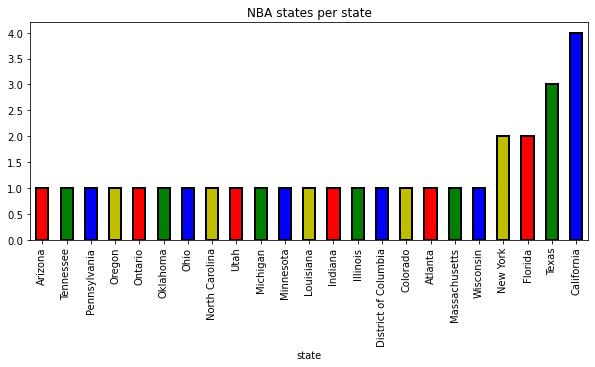

In [145]:
nba_teams_2_gb.sort_values().plot(kind='bar', title="NBA states per state",
                                 edgecolor='black', linewidth=2, figsize=(10,4),
                                 color=['r', 'g', 'b', 'y'])
plt.show()

California & Texas

In [146]:
nba_teams_2_df[nba_teams_2_df.state=='California']

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970
10,1610612747,Los Angeles Lakers,LAL,Lakers,Los Angeles,California,1948
21,1610612758,Sacramento Kings,SAC,Kings,Sacramento,California,1948


In [147]:
nba_teams_2_df[nba_teams_2_df.state=='Texas']

,id,full_name,abbreviation,nickname,city,state,year_founded
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
22,1610612759,San Antonio Spurs,SAS,Spurs,San Antonio,Texas,1976


In [148]:
nba_teams_2_df[nba_teams_2_df.state=='New York']

,id,full_name,abbreviation,nickname,city,state,year_founded
14,1610612751,Brooklyn Nets,BKN,Nets,Brooklyn,New York,1976
15,1610612752,New York Knicks,NYK,Knicks,New York,New York,1946


There is an error in the data as Brooklyn is not a city I guess or not?

In [149]:
nba_teams_2_df.loc[nba_teams_2_df.full_name == 'Brooklyn Nets', 'city'] = 'New York'

In [150]:
nba_teams_2_df[nba_teams_2_df.state=='New York']

,id,full_name,abbreviation,nickname,city,state,year_founded
14,1610612751,Brooklyn Nets,BKN,Nets,New York,New York,1976
15,1610612752,New York Knicks,NYK,Knicks,New York,New York,1946


<b>Selecting teams</b>

In [151]:
# Check if a teams is more than once represented in the data,
# either due to error or other reasons.
print(len(nba_teams_2_df.full_name))
print(len(nba_teams_2_df.full_name.unique()))

30
30


In [152]:
# All teams represented in the data
nba_teams_2_df.full_name

0              Atlanta Hawks
1             Boston Celtics
2        Cleveland Cavaliers
3       New Orleans Pelicans
4              Chicago Bulls
5           Dallas Mavericks
6             Denver Nuggets
7      Golden State Warriors
8            Houston Rockets
9       Los Angeles Clippers
10        Los Angeles Lakers
11                Miami Heat
12           Milwaukee Bucks
13    Minnesota Timberwolves
14             Brooklyn Nets
15           New York Knicks
16             Orlando Magic
17            Indiana Pacers
18        Philadelphia 76ers
19              Phoenix Suns
20    Portland Trail Blazers
21          Sacramento Kings
22         San Antonio Spurs
23     Oklahoma City Thunder
24           Toronto Raptors
25                 Utah Jazz
26         Memphis Grizzlies
27        Washington Wizards
28           Detroit Pistons
29         Charlotte Hornets
Name: full_name, dtype: object

In [153]:
MiamiHeat = nba_teams_2_df[nba_teams_2_df.full_name == 'Miami Heat']
MiamiHeat 

,id,full_name,abbreviation,nickname,city,state,year_founded
11,1610612748,Miami Heat,MIA,Heat,Miami,Florida,1988


In [154]:
MiamiHeat['id'] 

11    1610612748
Name: id, dtype: int64

In [155]:
IndianaPacers = nba_teams_2_df[nba_teams_2_df.full_name == 'Indiana Pacers']
IndianaPacers

,id,full_name,abbreviation,nickname,city,state,year_founded
17,1610612754,Indiana Pacers,IND,Pacers,Indiana,Indiana,1976


In [156]:
LosAngelesLakers = nba_teams_2_df[nba_teams_2_df.full_name == 'Los Angeles Lakers']
LosAngelesLakers

,id,full_name,abbreviation,nickname,city,state,year_founded
10,1610612747,Los Angeles Lakers,LAL,Lakers,Los Angeles,California,1948


In [157]:
GoldenStateWarriors = nba_teams_2_df[nba_teams_2_df.full_name == 'Golden State Warriors']
GoldenStateWarriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [158]:
MemphisGrizzlies = nba_teams_2_df[nba_teams_2_df.full_name == 'Memphis Grizzlies']
MemphisGrizzlies

,id,full_name,abbreviation,nickname,city,state,year_founded
26,1610612763,Memphis Grizzlies,MEM,Grizzlies,Memphis,Tennessee,1995


### Importing the NBA data: players

In [159]:
from nba_api.stats.static import players
dir(players)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_find_players',
 '_get_player_dict',
 'find_player_by_id',
 'find_players_by_first_name',
 'find_players_by_full_name',
 'find_players_by_last_name',
 'get_active_players',
 'get_inactive_players',
 'get_players',
 'player_index_first_name',
 'player_index_full_name',
 'player_index_id',
 'player_index_is_active',
 'player_index_last_name',
 'players',
 're']

<b>Exploring the functions provided by the API.</b>

<p>
The func get_players gives a nice list of players.
</p> 


In [160]:
players_l = players.get_players()

print(type(players_l))
print(len(players_l))
print(players_l[:3])

<class 'list'>
4501
[{'id': 76001, 'full_name': 'Alaa Abdelnaby', 'first_name': 'Alaa', 'last_name': 'Abdelnaby', 'is_active': False}, {'id': 76002, 'full_name': 'Zaid Abdul-Aziz', 'first_name': 'Zaid', 'last_name': 'Abdul-Aziz', 'is_active': False}, {'id': 76003, 'full_name': 'Kareem Abdul-Jabbar', 'first_name': 'Kareem', 'last_name': 'Abdul-Jabbar', 'is_active': False}]


In [161]:
players_l_df = pd.DataFrame(players_l)
players_l_df.head()


,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False


In [162]:
players_l_df.tail()

,id,full_name,first_name,last_name,is_active
4496,1627790,Ante Zizic,Ante,Zizic,True
4497,78647,Jim Zoet,Jim,Zoet,False
4498,78648,Bill Zopf,Bill,Zopf,False
4499,1627826,Ivica Zubac,Ivica,Zubac,True
4500,78650,Matt Zunic,Matt,Zunic,False


In [163]:
type(players_l_df.is_active[0])
# players_l_df['is_active'].astype('float').plot(kind='bar')

numpy.bool_

In [164]:
active = players_l_df.groupby('is_active')['id'].count()

print(active)
print(type(active))

is_active
False    3982
True      519
Name: id, dtype: int64
<class 'pandas.core.series.Series'>


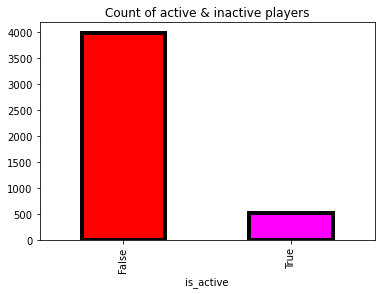

In [165]:
active.plot(kind='bar', edgecolor='black', linewidth=4, color=['r', 'magenta'],
            title='Count of active & inactive players')
plt.show()

There are even functions to get the active players.

In [166]:
players_active = pd.DataFrame(players.get_active_players())
players_active.head()

,id,full_name,first_name,last_name,is_active
0,203500,Steven Adams,Steven,Adams,True
1,1628389,Bam Adebayo,Bam,Adebayo,True
2,200746,LaMarcus Aldridge,LaMarcus,Aldridge,True
3,1629734,Kyle Alexander,Kyle,Alexander,True
4,1629638,Nickeil Alexander-Walker,Nickeil,Alexander-Walker,True


This gives the column indexes. 

In [167]:
players.player_index_first_name

2

In [168]:
players.player_index_id

0

### Importing the NBA data from endpoints: LeagueLeaders

In [169]:
from nba_api.stats.endpoints import LeagueLeaders

In [170]:
dir(LeagueLeaders)

['DataSet',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'data_sets',
 'endpoint',
 'expected_data',
 'get_available_data',
 'get_data_frames',
 'get_dict',
 'get_json',
 'get_normalized_dict',
 'get_normalized_json',
 'get_request',
 'get_request_url',
 'get_response',
 'headers',
 'load_response',
 'nba_response',
 'player_stats',
 'team_stats']

In [171]:
dir(endpoints.leagueleaders.LeagueLeaders)

['DataSet',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'data_sets',
 'endpoint',
 'expected_data',
 'get_available_data',
 'get_data_frames',
 'get_dict',
 'get_json',
 'get_normalized_dict',
 'get_normalized_json',
 'get_request',
 'get_request_url',
 'get_response',
 'headers',
 'load_response',
 'nba_response',
 'player_stats',
 'team_stats']

In [172]:
# Here we access the leagueleaders module through endpoints & assign the class to "data"
ll = endpoints.leagueleaders.LeagueLeaders() 

# Our "data" variable now has built in functions such as creating a dataframe for our data
ll_df = ll.league_leaders.get_data_frame()

In [173]:
ll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PLAYER_ID  506 non-null    int64  
 1   RANK       506 non-null    int64  
 2   PLAYER     506 non-null    object 
 3   TEAM       506 non-null    object 
 4   GP         506 non-null    int64  
 5   MIN        506 non-null    int64  
 6   FGM        506 non-null    int64  
 7   FGA        506 non-null    int64  
 8   FG_PCT     506 non-null    float64
 9   FG3M       506 non-null    int64  
 10  FG3A       506 non-null    int64  
 11  FG3_PCT    506 non-null    float64
 12  FTM        506 non-null    int64  
 13  FTA        506 non-null    int64  
 14  FT_PCT     506 non-null    float64
 15  OREB       506 non-null    int64  
 16  DREB       506 non-null    int64  
 17  REB        506 non-null    int64  
 18  AST        506 non-null    int64  
 19  STL        506 non-null    int64  
 20  BLK       

In [174]:
print(ll_df.head())

   PLAYER_ID  RANK                 PLAYER TEAM  GP   MIN  FGM  FGA  FG_PCT  \
0     203081     1         Damian Lillard  POR  47  1687  429  958   0.448   
1     203507     2  Giannis Antetokounmpo  MIL  45  1529  468  829   0.565   
2     203078     3           Bradley Beal  WAS  41  1454  449  926   0.485   
3     203999     4           Nikola Jokic  DEN  48  1711  503  887   0.567   
4     203897     5            Zach LaVine  CHI  46  1608  452  884   0.511   

   FG3M  ...  REB  AST  STL  BLK  TOV   PF   PTS   EFF  AST_TOV  STL_TOV  
0   196  ...  200  363   45   12  150   74  1391  1309     2.42     0.30  
1    51  ...  512  277   51   60  169  129  1294  1524     1.64     0.30  
2    90  ...  206  196   49   15  137  102  1284  1104     1.43     0.36  
3    73  ...  528  405   73   31  147  129  1274  1750     2.76     0.50  
4   156  ...  229  218   39   20  171  112  1261  1132     1.28     0.23  

[5 rows x 27 columns]


In [175]:
print(ll_df.tail())

     PLAYER_ID  RANK            PLAYER TEAM  GP  MIN  FGM  FGA  FG_PCT  FG3M  \
501    1628394   503  Anzejs Pasecniks  WAS   1    6    0    1     0.0     0   
502    1630204   503     Ashton Hagans  MIN   2    4    0    0     0.0     0   
503     204222   503  Greg Whittington  DEN   4   12    0    3     0.0     0   
504     203943   503       Noah Vonleh  BKN   4   11    0    3     0.0     0   
505    1630266   503       Will Magnay  NOP   1    3    0    1     0.0     0   

     ...  REB  AST  STL  BLK  TOV  PF  PTS  EFF  AST_TOV  STL_TOV  
501  ...    1    1    0    0    5   2    0   -4      0.2      0.0  
502  ...    0    0    0    0    1   0    0   -1      0.0      0.0  
503  ...    0    0    0    0    0   0    0   -3      0.0      0.0  
504  ...    1    1    0    0    2   2    0   -3      0.5      0.0  
505  ...    0    0    0    0    1   1    0   -2      0.0      0.0  

[5 rows x 27 columns]


In [176]:
ll_df_fga = ll_df.groupby('TEAM')['FGA'].mean()

ll_df_fga.head()

TEAM
ATL    286.687500
BKN    227.250000
BOS    270.312500
CHA    274.125000
CHI    296.941176
Name: FGA, dtype: float64

In [177]:
print(type(ll_df_fga))
print(list(ll_df_fga.index))

<class 'pandas.core.series.Series'>
['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']


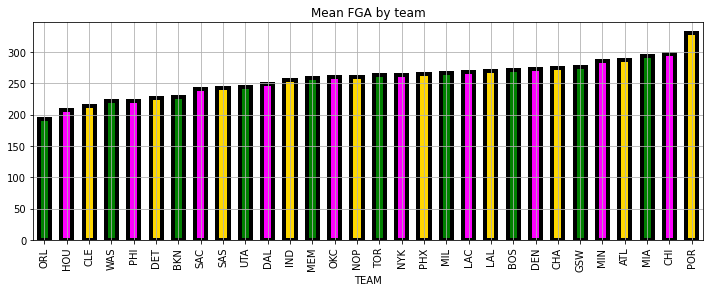

In [178]:
ll_df_fga.sort_values().plot(kind='bar', figsize=(12,4), linewidth=4,
                             title="Mean FGA by team", 
                             color=['g', 'magenta', 'gold'], edgecolor='black')
plt.grid()
plt.show()

In [179]:
ll_df.RANK = ll_df.RANK.astype('float')

In [180]:
print(len(ll_df.RANK.unique()))
print(ll_df.RANK.unique()[-10:-1])

358
[470. 472. 475. 477. 481. 485. 491. 495. 502.]


In [181]:
print(type(ll_df.RANK))
print(pd.DataFrame(ll_df.RANK).dtypes)

<class 'pandas.core.series.Series'>
RANK    float64
dtype: object


In [182]:
print(ll_df.shape)
print(len(ll_df.columns))

(506, 27)
27


In [183]:
ll_df.columns.get_loc('RANK')

1

In [184]:
ll_df_columns_index = {}

for c in ll_df.columns:
    i = ll_df.columns.get_loc(c)
    ll_df_columns_index[c] = i

print(ll_df_columns_index)

{'PLAYER_ID': 0, 'RANK': 1, 'PLAYER': 2, 'TEAM': 3, 'GP': 4, 'MIN': 5, 'FGM': 6, 'FGA': 7, 'FG_PCT': 8, 'FG3M': 9, 'FG3A': 10, 'FG3_PCT': 11, 'FTM': 12, 'FTA': 13, 'FT_PCT': 14, 'OREB': 15, 'DREB': 16, 'REB': 17, 'AST': 18, 'STL': 19, 'BLK': 20, 'TOV': 21, 'PF': 22, 'PTS': 23, 'EFF': 24, 'AST_TOV': 25, 'STL_TOV': 26}


In [185]:
print(len(ll_df.iloc[:, 4:26].columns))

22


In [186]:
ll_df.aggregate(['min', 'max' ,'mean', 'median'])

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
min,2.544000e+03,1.000000,Aaron Gordon,ATL,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000
max,1.630271e+06,503.000000,Zion Williamson,WAS,50.000000,1810.000000,503.000000,969.000000,1.000000,198.000000,...,646.000000,454.00000,77.000000,156.00000,206.000000,169.000000,1391.000000,1750.000000,13.000000,6.000000
mean,1.141579e+06,253.077075,NaN,NaN,30.683794,696.667984,118.312253,254.666008,0.441164,36.752964,...,127.772727,71.01581,21.743083,14.13834,38.464427,56.132411,322.197628,368.067194,1.753063,0.666581
median,1.628378e+06,253.500000,NaN,NaN,33.000000,675.500000,93.000000,203.500000,0.441000,22.000000,...,103.000000,48.00000,18.500000,9.00000,28.500000,53.000000,251.500000,302.500000,1.615000,0.570000


### Predictive modeling

In [187]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_ll, y_ll = ll_df.iloc[:, 4:26], ll_df.iloc[:, 1]


In [188]:
print(np.shape(X_ll))
print(np.shape(y_ll))

(506, 22)
(506,)


In [189]:
print(X_ll.head())

   GP   MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  ...  DREB  REB  \
0  47  1687  429  958   0.448   196   513    0.382  337  360  ...   176  200   
1  45  1529  468  829   0.565    51   169    0.302  307  447  ...   432  512   
2  41  1454  449  926   0.485    90   266    0.338  296  328  ...   160  206   
3  48  1711  503  887   0.567    73   170    0.429  195  225  ...   390  528   
4  46  1608  452  884   0.511   156   368    0.424  201  233  ...   201  229   

   AST  STL  BLK  TOV   PF   PTS   EFF  AST_TOV  
0  363   45   12  150   74  1391  1309     2.42  
1  277   51   60  169  129  1294  1524     1.64  
2  196   49   15  137  102  1284  1104     1.43  
3  405   73   31  147  129  1274  1750     2.76  
4  218   39   20  171  112  1261  1132     1.28  

[5 rows x 22 columns]


In [190]:
print(y_ll.head())

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: RANK, dtype: float64


#### Train-test-split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_ll, y_ll, random_state=33)


In [192]:
for i in [X_train, X_test, y_train, y_test]:
    print("i: {} of type: {}".format(i.shape, type(i)))

i: (379, 22) of type: <class 'pandas.core.frame.DataFrame'>
i: (127, 22) of type: <class 'pandas.core.frame.DataFrame'>
i: (379,) of type: <class 'pandas.core.series.Series'>
i: (127,) of type: <class 'pandas.core.series.Series'>


#### Preprocessing

In [193]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [194]:
X_train = scaler.transform(X_train)

In [195]:
X_test = scaler.transform(X_test)

#### KNN-model

In [196]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [197]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [198]:
y_pred = knn.predict(X_test)

In [199]:
accuracy_score(y_test, y_pred)

0.031496062992125984

This seems rather low. The model deliver not good predictions.

#### LinearRegression-model

In [200]:
from sklearn.linear_model import LinearRegression

In [201]:
ll_df_n = ll_df.select_dtypes(include=['float'])

print(ll_df_n.columns)
print(len(ll_df_n.columns))

Index(['RANK', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'AST_TOV', 'STL_TOV'], dtype='object')
6


In [202]:
ll_df_n.aggregate(['min', 'max', 'mean'])

,RANK,FG_PCT,FG3_PCT,FT_PCT,AST_TOV,STL_TOV
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,503.000000,1.000000,1.000000,1.000000,13.000000,6.000000
mean,253.077075,0.441164,0.299085,0.709567,1.753063,0.666581


#### Train-test-split

In [203]:
X_n, y_n = ll_df_n.iloc[:, 1:len(ll_df_n.columns)], ll_df_n.iloc[:, 1]

In [204]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, random_state=33)

In [205]:
for i in [X_train_n, X_test_n, y_train_n, y_test_n]:
    print("i: {} of type: {}".format(i.shape, type(i)))

i: (379, 5) of type: <class 'pandas.core.frame.DataFrame'>
i: (127, 5) of type: <class 'pandas.core.frame.DataFrame'>
i: (379,) of type: <class 'pandas.core.series.Series'>
i: (127,) of type: <class 'pandas.core.series.Series'>


#### Preprocessing

In [206]:
scaler_n = preprocessing.StandardScaler().fit(X_train_n)

In [207]:
X_train_n = scaler_n.transform(X_train_n)

In [208]:
X_test_n = scaler_n.transform(X_test_n)

In [209]:
lr = LinearRegression(normalize=True)

In [210]:
lr.fit(X_train_n, y_train_n)

LinearRegression(normalize=True)

In [211]:
ylr_pred_n = lr.predict(X_test_n)
print(ylr_pred_n[:5])

[0.398 0.446 0.667 0.444 0.45 ]


In [212]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_n, ylr_pred_n)


1.7811648918690996e-16

In [213]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_n, ylr_pred_n)

7.538120131937065e-32

In [214]:
# R² Score
from sklearn.metrics import r2_score
r2_score(y_test_n, ylr_pred_n)

1.0

The variance in the dependent variable is 100 percent predicted by the independent variables.

### An example for a dysfunctional endpoint: LeagueGameFinder

<p>
LeagueGameFinder provides a variety of staticals information about the NBA games. It is in the path:<br>
nba_api/docs/nba_api/stats/endpoints/<br>
of the NBA API. It is one of many statistical modules of the API.<br>
<a href="https://github.com/swar/nba_api/blob/master/docs/nba_api/stats/endpoints/leaguegamefinder.md" target="_blank">Github</a><br>
</p> 
<p>
However at the point of this project the API does not work.<br>
</p>     

<p>    
<img src="league_error.png" alt="Smiley face" height="600" width="600">     
</p>   

<p>    
There is a Stack post concerning the problem:
<a href="https://stackoverflow.com/questions/66736607/connection-timeout-error-is-thrown-while-using-leaguegamefinder-of-nba-api-stats" target="_blank">Connection Timeout error is thrown while using leaguegamefinder of nba_api.stats.endpoints library</a>. There are also a lot of threads on <a href="https://github.com/swar/nba_api/issues/94" target="_blank">Github </a> on this. One solution is updating. This does not work here.
Another suggestion is working around the timeout error with looping. This seems not feasible. The solution could be to adapt the API soruce code to the changes on the server site. This would be a substantial effort probably. This is not the goal of this project, but the error is kept in the project. It
is very instructive for the issues someone can run into, when dealing with API's not only maintained by the communities but also enterprises.
</p> 




In [215]:
nk = !pip install --upgrade nba_api
# Requirement already satisfied

In [216]:
from nba_api.stats.endpoints import leaguegamefinder
# leaguegamefinder

### help(leaguegamefinder)
shows a time out error at 30 calls.


<p>
<img src="league_error_timeout.png" alt="error" height="700" width="700">     
</p>

The parameter <code>team_id_nullable</code> is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.  
The information requested is provided and is transmitted via an HTTP response this is assigned to the object <code>gamefinder</code>.


In [217]:
dir(leaguegamefinder.LeagueGameFinder)

['DataSet',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'data_sets',
 'endpoint',
 'expected_data',
 'get_available_data',
 'get_data_frames',
 'get_dict',
 'get_json',
 'get_normalized_dict',
 'get_normalized_json',
 'get_request',
 'get_request_url',
 'get_response',
 'headers',
 'load_response',
 'nba_response',
 'player_stats',
 'team_stats']

In [218]:
# This code does not work but should.

# find_games =  leaguegamefinder.LeagueGameFinder(team_id_nullable=1610612751 )
# find_games.get_json()[:500]
# find_games = gamefinder.get_data_frames()[0]
# find_games.head()